## Real Estate -Price Predictor

In [80]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB



7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.

In [5]:
df["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284781,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.701662,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.205000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

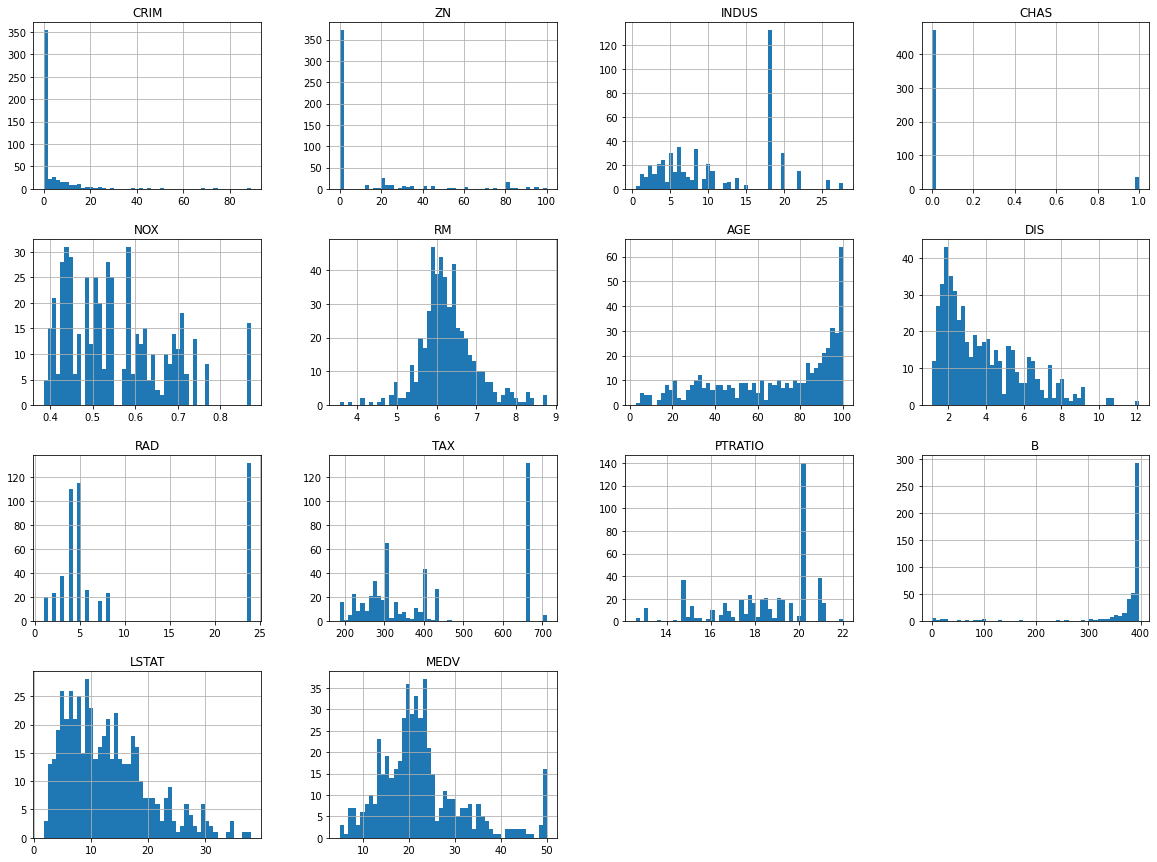

In [7]:
df.hist(bins=50,figsize=(20,15))

## Looking for Correaltions

In [8]:
corr_matrix = df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.692936
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

## Train-Test Split

In [9]:
df_label = df["MEDV"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df, df_label, test_size=0.2, random_state=42)

In [11]:
print(f"Rows in X_train:{len(X_train)}")
print(f"Rows in X_test:{len(X_test)}")

Rows in X_train:404
Rows in X_test:102


In [12]:
X_test['CHAS'].value_counts()

0    96
1     6
Name: CHAS, dtype: int64

In [13]:
X_train['CHAS'].value_counts()

0    375
1     29
Name: CHAS, dtype: int64

## Missing Attributes

To take care of missing attributes, you have three options:
1. Get rid of the missing data points
2. Get rid of the whole attribute
3. Set the value to some value(0, mean or median)

In [14]:
median = df["RM"].median()
median

6.205

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")  # Change to "median" if needed
X_train = imputer.fit_transform(X_train)  # Fit and transform training data
X_test = imputer.transform(X_test)  # Transform test data


In [16]:
df.shape

(506, 14)

In [17]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284781,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.701662,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.205000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy="median")

# Fit the imputer on the dataset
imputer.fit(df)


SimpleImputer(strategy='median')

In [19]:
imputer.statistics_

array([2.56510e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.20500e+00, 7.75000e+01, 3.20745e+00, 5.00000e+00, 3.30000e+02,
       1.90500e+01, 3.91440e+02, 1.13600e+01, 2.12000e+01])

In [20]:
X=imputer.transform(df)

In [21]:
df_tr=pd.DataFrame(X,columns=df.columns)

In [22]:
df_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284781,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.701662,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.205000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Scikit_Learn Design

Primarily, three types of objects

1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization) (value - min)/(max - min) Sklearn provides a class called MinMaxScaler for this

2. Standardization (value - mean)/std Sklearn provides a class called StandardScaler for this

In [56]:
from sklearn.preprocessing import StandardScaler  # Import the scaler

scaler = StandardScaler()  # Create an instance
X_train = scaler.fit_transform(X_train)  # Apply scaling


In [68]:
X_test=scaler.transform(X_test)

## Selecting a desired model 

In [69]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [70]:
model.fit(X_train,y_train)

LinearRegression()

In [85]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)

# Predict on both training and test sets
y_train_pred = model.predict(X_train)  # Predictions on training set
y_test_pred = model.predict(X_test)    # Predictions on test set

# Print sample predictions
print("Training Predictions:", y_train_pred[:5])  # Show first 5 predictions
print("Testing Predictions:", y_test_pred[:5])


Training Predictions: [12.  19.9 19.4 13.4 18.2]
Testing Predictions: [ 8.62032682e-02  1.03034948e+00 -9.86690150e-01  3.71794749e-04
 -7.18466795e-01]


In [86]:
print(f"Training set shape: {X_train.shape}")  # Should show (rows, 14)
print(f"Testing set shape:{X_test.shape}")


Training set shape: (404, 14)
Testing set shape:(102, 14)


## Using better evaluation technique - Cross Validation

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

array([-9.65682616e-28, -1.77199585e-27, -1.26987322e-26, -2.55743836e-27,
       -6.24551039e-28])

In [75]:
np.mean(mse)

-8.922700760976422e-28

## Save the Model

In [76]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

## Testing the model on test Data

In [79]:
y_pred=model.predict(X_test)
y_pred

array([ 8.62032682e-02,  1.03034948e+00, -9.86690150e-01,  3.71794749e-04,
       -7.18466795e-01, -3.00038362e-01, -5.36074914e-01, -9.43774413e-01,
       -3.42954099e-01, -6.43364256e-01, -1.39104350e-01, -4.18056638e-01,
       -1.69479981e+00, -1.71291152e-01, -4.60972375e-01,  7.51397187e-01,
       -4.28785572e-01, -1.35147391e+00,  2.91864189e+00, -9.33045479e-01,
        2.57866215e-01,  6.76294648e-01, -1.08325056e+00, -4.25439420e-02,
       -9.22316545e-01, -9.65232281e-01, -2.67851560e-01, -8.47214005e-01,
       -1.17646481e-01, -4.82430243e-01,  3.25585973e-02,  1.07661137e-01,
       -8.36485071e-01, -2.14206889e-01, -3.96598770e-01, -3.64411967e-01,
        1.27711496e+00, -3.53683033e-01,  1.72034742e-01,  6.47453998e-02,
       -3.32225165e-01,  5.79734240e-01,  2.91864189e+00, -5.78990651e-01,
       -2.10860736e-02, -8.25756137e-01, -1.04033482e+00,  1.50576873e-01,
       -3.10767296e-01,  1.29119005e-01, -4.18056638e-01,  1.35221750e+00,
       -8.15027203e-01,  

## Calculate Accuracy Metrics

#### R² Score (Coefficient of Determination)

In [88]:
r2 = r2_score(y_test, y_pred)
r2


-6.175935266432227

In [89]:
mse = mean_squared_error(y_test, y_pred)
mse


526.2384808010553

In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

y_pred = poly_model.predict(X_test)
r2 = poly_model.score(X_test, y_test)
print(f"New R² Score: {r2:.4f}")


New R² Score: -14.7666
